<h1>Импорт библиотек

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [15]:
def sum_prod(X, V):
    return np.sum([x @ v for x, v in zip(X, V)], axis=0)

matrices = [np.zeros((2, 2)), np.zeros((2, 2))]
vectors = [np.zeros((2, 1)), np.zeros((2, 1))]
print(np.allclose(sum_prod(matrices, vectors), np.zeros((2, 1))))

matrices = [np.eye(2), np.eye(2)]
vectors = [np.array([[1],[1]]), np.array([[2],[2]])]
print(np.allclose(sum_prod(matrices, vectors), np.array([[3],[3]])))


True
True


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [8]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

test_m1 = np.array([[1, 2, 3],
                  [0.1, 0.2, 0.3],
                  [1, 2, 3]
                  ])
print(binarize(test_m1), end='\n\n')
test_m2 = np.array([[-1, -2, -3],
                    [-5, -5, -5],
                    [1, 2, 3]
                    ])
print(binarize(test_m2, threshold=-5))

[[1 1 1]
 [0 0 0]
 [1 1 1]]

[[1 1 1]
 [0 0 0]
 [1 1 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [11]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(column) for column in mat.T]

test_matrix = np.array([[1, 2, 2, 3], [4, 5, 5, 6], [7, 8, 8, 9]])

print(unique_rows(test_matrix))
print(unique_columns(test_matrix))

[array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]
[array([1, 4, 7]), array([2, 5, 8]), array([2, 5, 8]), array([3, 6, 9])]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

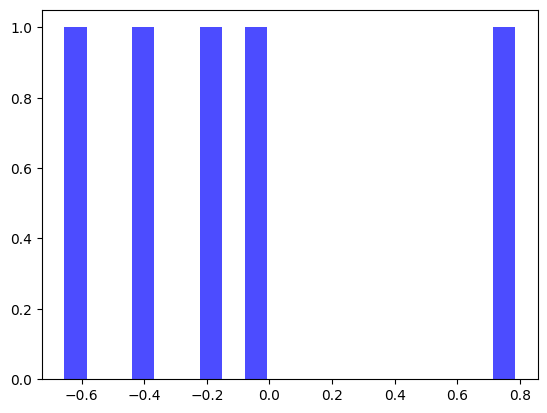

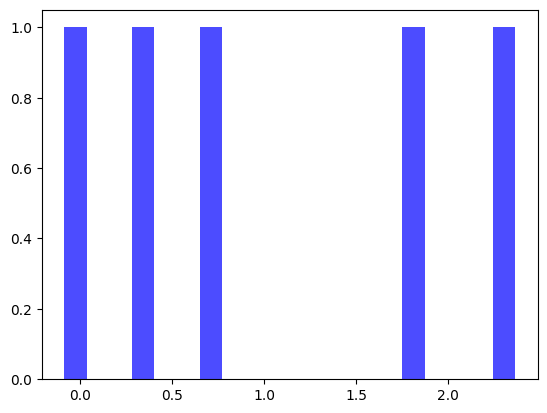

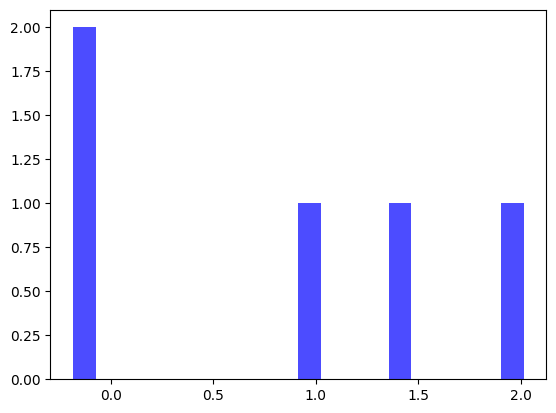

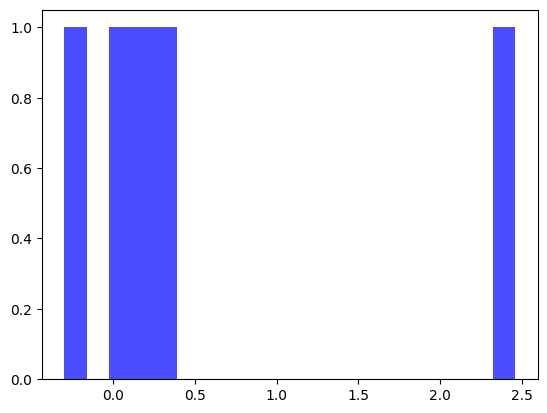

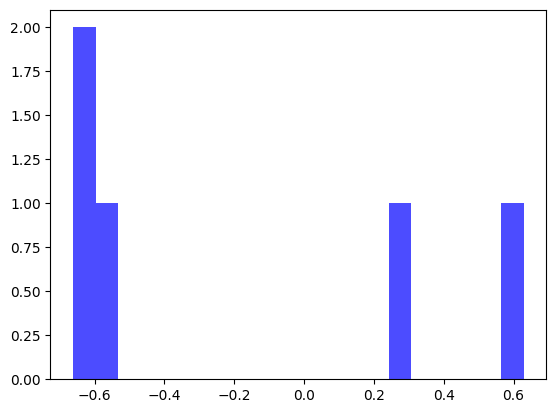

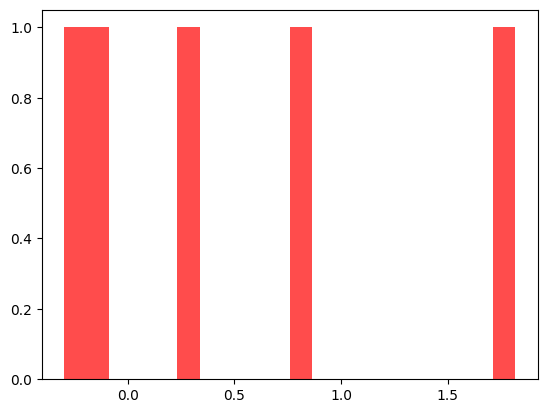

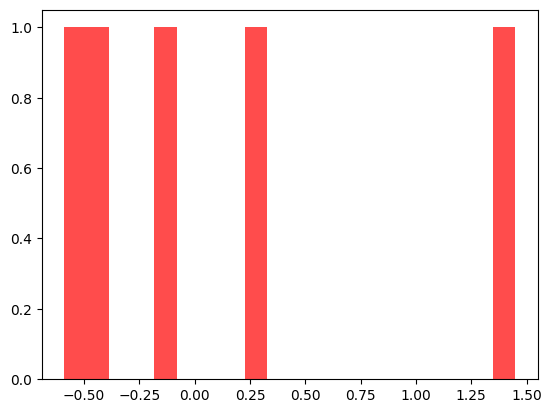

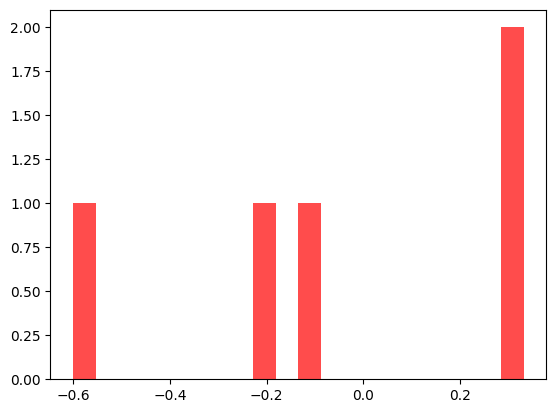

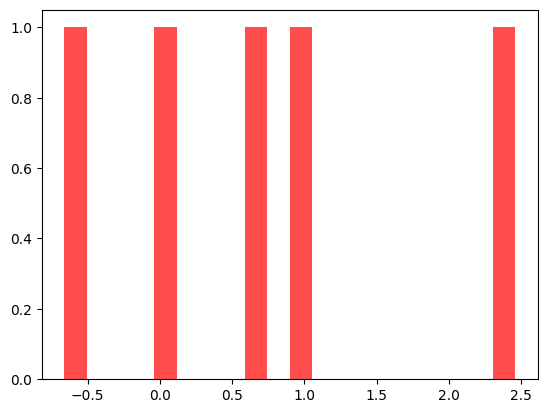

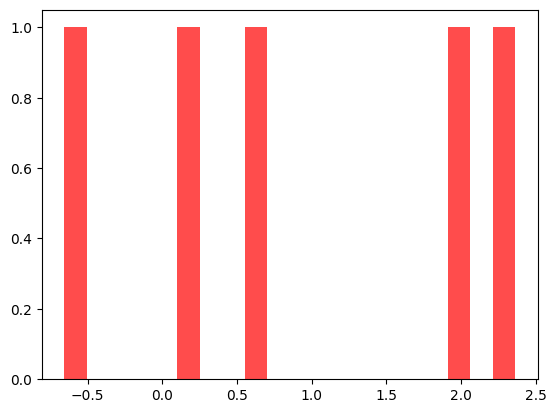

In [17]:
def anylize_random_normal_matrix(m, n):
    # строим матрицу
    matrix = np.random.normal(size=(m,n))

    # считаем мат. ожидание и дисперсию для столбцов
    column_mean = np.mean(matrix, axis=0)
    column_var = np.var(matrix, axis=0)

    # считаем мат. ождиание и дисперсию для строк
    row_mean = np.mean(matrix, axis=1)
    row_var = np.var(matrix, axis=1)

    # строим для каждого столбца гистограмму значений
    for i in range(n):
        plt.figure()
        plt.hist(matrix[:,i], bins=20, color='blue', alpha=0.7)
        plt.show()

    # строим для каждой строки гистограмму значений
    for i in range(m):
        plt.figure()
        plt.hist(matrix[i,:], bins=20, color='red', alpha=0.7)

res = anylize_random_normal_matrix(5, 5)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [23]:
def chess(m, n, a, b):
    matrix = np.full((m, n), a)
    matrix[1::2, ::2] = a
    matrix[::2, 1::2] = b
    return matrix

print(chess(3, 3, 3, 4), end='\n\n')
print(chess(5, 5, 3, 4))

[[3 4 3]
 [3 3 3]
 [3 4 3]]

[[3 4 3 4 3]
 [3 3 3 3 3]
 [3 4 3 4 3]
 [3 3 3 3 3]
 [3 4 3 4 3]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

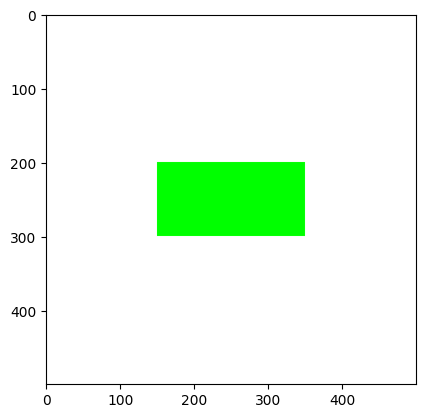

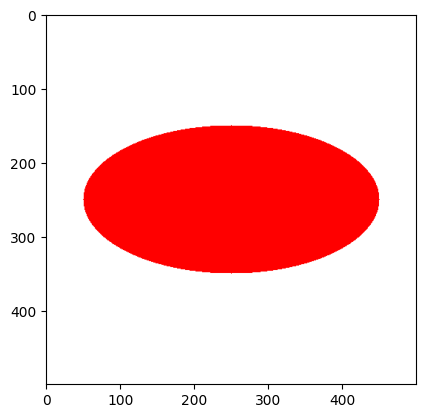

In [5]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.full((m, n, 3), background_color)
    img[int((m-b)/2):int((m+b)/2), int((n-a)/2):int((n+a)/2)] = rectangle_color
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.full((m, n, 3), background_color)
    for y in range(m):
        for x in range(n):
            if ((x-n//2)**2/a**2 + (y-m//2)**2/b**2 <= 1):
                img[y, x] = ellipse_color
    return img


rect_img = draw_rectangle(200, 100, 500, 500, (0, 255, 0), (255, 255, 255))
plt.imshow(rect_img)
plt.show()

# Создание изображения 500x500 пикселей с белым фоном и нарисовать на нем красный эллипс
ellipse_img = draw_ellipse(200, 100, 500, 500, (255, 0, 0), (255, 255, 255))

# Отображение изображения
plt.imshow(ellipse_img)
plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [9]:
def analize_timeseries(timeseries, p):
    mean = np.mean(timeseries)
    var = np.var(timeseries)
    std = np.std(timeseries)
    maxima = (time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:])
    minima = (time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:])
    local_max = np.where(maxima)[0] + 1
    local_min = np.where(minima)[0] + 1
    moving_avg = np.convolve(timeseries, np.ones(p), 'valid') / p
    return mean, var, std, local_max, local_min, moving_avg


time_series = np.random.rand(100)
mean, var, std, local_max, local_min, moving_avg = analize_timeseries(time_series, 5)
print("Mean:", mean)
print("Variance:", var)
print("Standard Deviation:", std)
print("Local Max:", local_max)
print("Local Min:", local_min)
print("Moving Average:", moving_avg)

Mean: 0.46056302484362277
Variance: 0.09628253160939688
Standard Deviation: 0.31029426615617134
Local Max: [ 2  4  6 10 12 14 16 18 23 27 31 36 39 44 47 49 53 57 59 62 66 70 72 75
 78 80 83 85 88 90 92 95 97]
Local Min: [ 3  5  9 11 13 15 17 20 26 29 32 38 41 46 48 51 55 58 61 63 69 71 74 77
 79 81 84 86 89 91 93 96 98]
Moving Average: [0.69267975 0.79372732 0.84424776 0.8314184  0.78604694 0.60390655
 0.57786639 0.42456748 0.31120443 0.22104685 0.38488469 0.25654005
 0.42403151 0.48133298 0.61670051 0.50764154 0.53042204 0.4197807
 0.44006967 0.49617445 0.61593268 0.66417168 0.61301176 0.66691031
 0.56266282 0.44191534 0.42813966 0.59792192 0.44229357 0.38626059
 0.37148373 0.37257024 0.26649364 0.2654706  0.24894411 0.30793706
 0.31784249 0.25721365 0.31988195 0.41736958 0.49730906 0.56201473
 0.53663496 0.46981224 0.36852493 0.38124298 0.39849624 0.41360501
 0.5388397  0.71342674 0.6704171  0.56847347 0.63686301 0.6836395
 0.51517161 0.51021516 0.48111607 0.40334147 0.38218202 0.399

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [10]:
def one_hot_encoding(vector):
    num_classes = np.max(vector) + 1
    one_hot_vector = np.zeros((vector.shape[0], num_classes))
    one_hot_vector[np.arange(vector.shape[0]), vector] = 1
    return one_hot_vector

labels = np.array([0, 2, 3, 0])
one_hot_labels = one_hot_encoding(labels)
print(one_hot_labels)

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
